In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()


Saving tested.csv to tested.csv


In [3]:
# Check the uploaded files
import os
print(os.listdir())

# Define the path to the uploaded file
file_path = 'tested.csv'  # Make sure this matches the uploaded file name

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


['.config', 'tested.csv', 'sample_data']
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Let's see a few plots to see what we find

The first plot show:
The only survivors were women
The age range is between 18 and 50 years old, so it is a young population


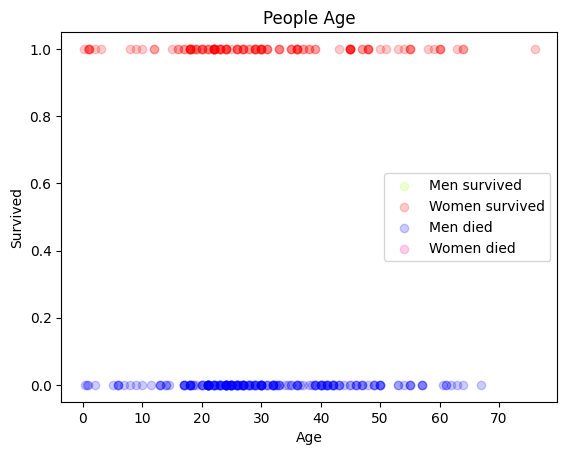

In [6]:
import matplotlib.pyplot as plt

men_ages_survived = df[(df['Survived'] == 1) & (df['Sex'] == "male")]["Age"]
men_survived = df[(df['Survived'] == 1) & (df['Sex'] == "male")]["Survived"]

women_ages_survived = df[(df['Survived'] == 1) & (df['Sex'] == "female")]["Age"]
women_survived = df[(df['Survived'] == 1) & (df['Sex'] == "female")]["Survived"]

plt.scatter(men_ages_survived, men_survived, alpha=0.2, color='greenyellow', label="Men survived")
plt.scatter(women_ages_survived, women_survived, alpha=0.2, color='red', label="Women survived")

men_ages_not_survived = df[(df['Survived'] == 0) & (df['Sex'] == "male")]["Age"]
men_not_survived = df[(df['Survived'] == 0) & (df['Sex'] == "male")]["Survived"]

women_ages_not_survived = df[(df['Survived'] == 0) & (df['Sex'] == "female")]["Age"]
women_not_survived = df[(df['Survived'] == 0) & (df['Sex'] == "female")]["Survived"]

plt.scatter(men_ages_not_survived, men_not_survived, alpha=0.2, color='blue', label="Men died")
plt.scatter(women_ages_not_survived, women_not_survived, alpha=0.2, color='deeppink', label="Women died")

plt.xlabel("Age")
plt.ylabel("Survived")
plt.title("People Age")
plt.legend()
plt.show()


The second one show:

The people with less number of parents/children/siblings/spouses aboard have more probability of survived

<Axes: >

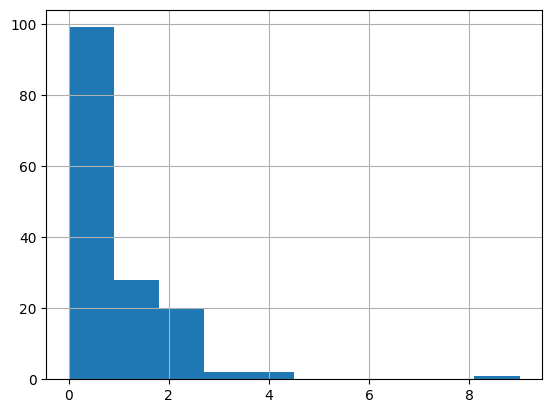

In [7]:
pclass_survived = df[(df['Survived'] == 1)]["Parch"]
pclass_survived.hist()

<Axes: >

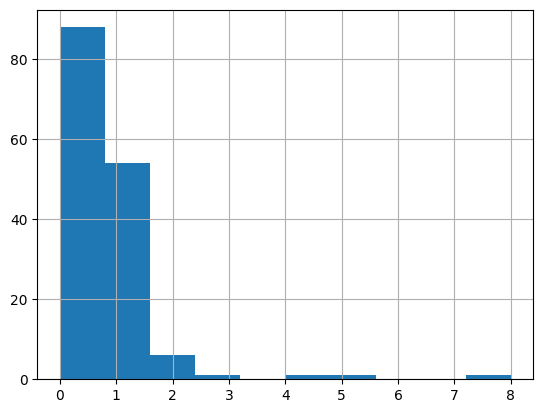

In [9]:
pclass_survived = df[(df['Survived'] == 1)]["SibSp"]
pclass_survived.hist()

The people with more money have more probability of survived ?¶
As everyone assume, the people who paid more (Fare column) there are those who were in first class, then those ones who were in second class, and so on. Lets see quick if this is true

In [11]:
first_class_spent = df[(df['Survived'] == 1) & (df['Pclass'] == 1)]["Fare"].mean()
second_class_spent = df[(df['Survived'] == 1) & (df['Pclass'] == 2)]["Fare"].mean()
third_class_spent = df[(df['Survived'] == 1) & (df['Pclass'] == 3)]["Fare"].mean()

print(f"First class mean spent: {first_class_spent}")
print(f"Second class mean spent: {second_class_spent}")
print(f"Third class mean spent: {third_class_spent}")


First class mean spent: 115.591168
Second class mean spent: 26.438750000000002
Third class mean spent: 13.735129166666667


#Nice, so now is a fact. Now we are available to see how many people survived per class


<Axes: >

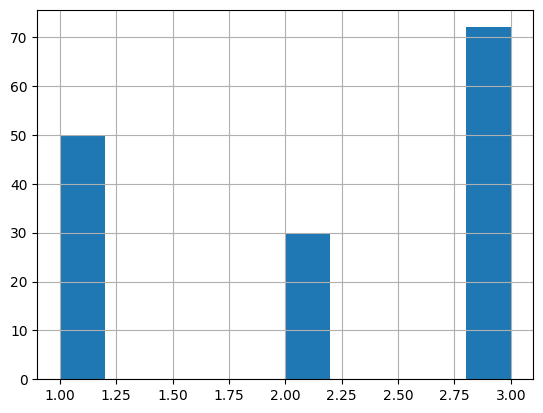

In [12]:
pclass_survived = df[(df['Survived'] == 1)]["Pclass"]
pclass_survived.hist()

Prepare the data¶
Fill the empty values, also I will drop some columns because I dont think they are significant and helps to simplify the model
Split the dataset into trainset and testeset

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

titanic = df.copy()

titanic.drop("Name", axis=1, inplace=True) # because in this case doesn't matter
titanic.drop("Cabin", axis=1, inplace=True) # because there are to many null entries
titanic.drop("Ticket", axis=1, inplace=True)
titanic["Sex"] = encoder.fit_transform(titanic["Sex"])
titanic["Embarked"] = encoder.fit_transform(titanic["Embarked"])

# Fill with the median value in both cases
age_median = titanic["Age"].median()
fare_median = titanic["Fare"].median()

titanic["Age"].fillna(age_median, inplace=True)
titanic["Fare"].fillna(age_median, inplace=True)

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [15]:
from sklearn.model_selection import train_test_split

X = titanic.drop("Survived", axis=1)
y = titanic["Survived"].copy()

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

Train the model

In this case we will use RandomForestClassifier. So first we train the model and then use cross_val_predict and predict_proba to get the predicted probabilities for each class. Instead of returning the predicted class labels, it will return a probability matrix where each row represents a sample of xtrain and each column represents the probability of that sample of belonging to a particular class.

The point of cross_val_predict is to provide a way to evaluate model performance on validation data without data leaks.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(xtrain, ytrain)

yprob_forest = cross_val_predict(forest_clf, xtrain, ytrain, cv=3, method="predict_proba")
yprob_forest = yprob_forest[:,1]

So, let's see the roc curve to see how it works our model. In a perfect world we want to have area = 1 in this plot

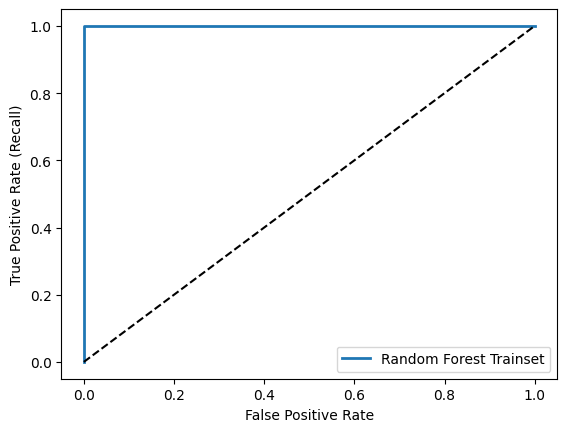

AUC = 1.0


In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr_forest, tpr_forest, thresholds_forest = roc_curve(ytrain, yprob_forest)

plot_roc_curve(fpr_forest, tpr_forest, "Random Forest Trainset")
plt.legend(loc="lower right")
plt.show()

auc = roc_auc_score(ytrain, yprob_forest)
print(f"AUC = {auc}")

Well, we are in a perfect world, who would say it. This could means two things:

Or the model is making a overfitting in the train test and then won't work as well in the testset
Or the model works absolutely nice
To see that we have to move on to the next step:

4. Test the model in the testset
Apparently the perfect functional model and that's it, this may be related to the fact that only the women survived and the size of the dataset



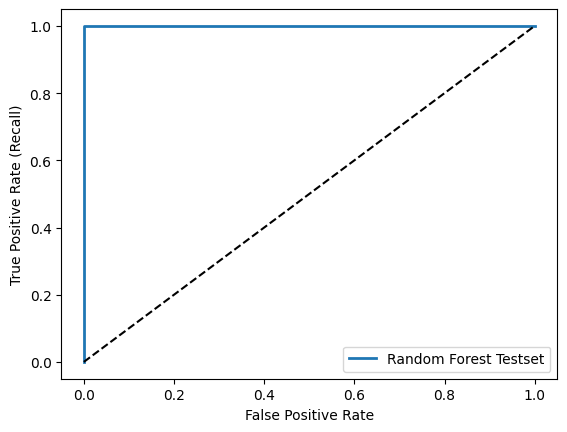

AUC = 1.0


In [18]:
predictions = forest_clf.predict_proba(xtest)[:,1]
fpr_test, tpr_test, thresholds_test = roc_curve(ytest, predictions)

plot_roc_curve(fpr_test, tpr_test, "Random Forest Testset")
plt.legend(loc="lower right")
plt.show()

auc = f"AUC = {roc_auc_score(ytest, predictions)}"
print(auc)

In [20]:
# Berapa jumlah penumpang titanic?
len(df)

418

In [21]:
len(df.loc[df.Sex == 'male'])

266

In [22]:
len(df.loc[df.Sex == 'female'])

152

In [23]:
len(df.loc[(df.Sex == 'male') & (df.Survived == 0)])

266

In [24]:
len(df.loc[(df.Sex == 'female') & (df.Survived == 0)])

0

In [25]:
len(df.loc[(df.Sex == 'female') & (df.Survived == 1)])

152

In [26]:
len(df.loc[(df.Sex == 'male') & (df.Survived == 1)])

0

In [27]:
len(df.loc[(df.Age == 34.5)])

1

In [28]:
len(df.loc[(df.Age == 27.0)])

12

In [29]:
len(df.loc[(df.Embarked == 'Q')])

46